In [18]:
import pandas as pd
import math
import numpy as np
from sklearn import tree
import scipy.stats
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

In [19]:
team_name="山形"
team_number=29
url=f"https://data.j-league.or.jp/SFMS01/search?competition_years=2019&competition_years=2018&competition_years=2017&competition_frame_ids=2&team_ids={team_number}&home_away_select=1&tv_relay_station_name="
fomerdata=pd.read_html(url,header=0)
data=fomerdata[0].drop(["大会","スタジアム"],axis=1)    
game_day=data.試合日
game_day=[s.replace("月・祝","月").replace("火・祝","火").replace("水・祝","水").replace("木・祝","木").replace("金・祝","金").replace("土・祝","土").replace("日・祝","日").replace("月・休","月") for s in game_day]
day=data.年度.astype(str)+"/"+game_day
day=pd.DataFrame({"年/月/日":day})
data=pd.concat([data,day],axis=1)
tenki=pd.read_excel(f"c:\\Users\\梅津魁秀\\Desktop\\卒業研究\\天気データ\\全国天気\\{team_name}.xlsx",skiprows=3)
tenki=tenki.fillna(0)
tenki=tenki.drop(tenki.index[[0]]).reset_index(drop=True)
tenki=tenki.drop(tenki.index[1095])
google_trend=pd.read_csv("gt.csv").drop(["Unnamed: 0"],axis=1)
google_trend=google_trend[f"{team_name}"]
tenki=pd.concat([tenki,google_trend],axis=1)
tenki=tenki.rename(columns={f"{team_name}":"ホームトレンド"})
day2=tenki.年.round().astype(int).astype(str)+"/"+tenki.月.round().astype(int).astype(str).str.zfill(2)+"/"+tenki.日.round().astype(int).astype(str).str.zfill(2)+"("+tenki.曜日+")"
day2=pd.DataFrame({"年/月/日":day2})
tenki=pd.concat([tenki,day2],axis=1)
data=pd.merge(data,tenki[["年/月/日","平均気温(℃)","降水量の合計(mm)","日照時間(時間)","ホームトレンド"]],on="年/月/日",how="left")
sec=data.節.str.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))
sec=sec.str.extract("(.+)節",expand=True).rename(columns={0:"節数"})
data=pd.concat([data,sec],axis=1)
rank=pd.read_csv("c:\\Users\\梅津魁秀\\anaconda3\\rank.csv").drop(["Unnamed: 0"],axis=1)
rank2=rank.rename(columns={"アウェイ":"ホーム"})
data=pd.merge(data,rank[["アウェイ","節数","年度","順位"]],on=["アウェイ","年度","節数"],how="left")
data=pd.merge(data,rank2[["ホーム","節数","年度","順位"]],on=["ホーム","年度","節数"],how="left")
data=data.rename(columns={"順位_x":"アウェイ順位","順位_y":"ホーム順位"})
data["節数"]=data["節数"].str.replace('第', '')
data["K/O時刻"]=data["K/O時刻"].str[:2]
score=data.スコア.str.split('-', expand=True)
score=score[[0,1]].astype(np.int64)
data["点数(ホームーアウェイ)"]=score[0]-score[1]
data=data.drop(["年度","節","試合日","ホーム","インターネット中継・TV放送","年/月/日","アウェイ","スコア"],axis=1)
temperature＿mean=int(data["平均気温(℃)"].mean())
#それぞれ平均を引いた値を出力する。
data["平均気温(℃)"]=round(data["平均気温(℃)"]-temperature＿mean,1)
data["入場者数"]=scipy.stats.zscore(data["入場者数"])

In [20]:
data=data.astype('float64')
data

,K/O時刻,入場者数,平均気温(℃),降水量の合計(mm),日照時間(時間),ホームトレンド,節数,アウェイ順位,ホーム順位,点数(ホームーアウェイ)
0,14.0,1.026640,-9.8,1.5,8.2,24.0,4.0,16.0,10.0,0.0
1,14.0,-0.432777,-11.8,0.0,7.0,21.0,5.0,5.0,11.0,0.0
2,17.0,-0.938352,-7.2,0.5,1.5,34.0,7.0,9.0,10.0,1.0
3,14.0,-0.995269,-4.4,3.0,1.7,34.0,8.0,3.0,10.0,1.0
4,14.0,0.133640,-0.9,0.0,12.7,27.0,11.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58,14.0,0.340109,4.4,1.5,1.8,34.0,34.0,7.0,4.0,-1.0
59,14.0,-0.705584,-3.7,0.5,0.1,45.0,36.0,22.0,3.0,2.0
60,13.0,0.075153,-2.2,2.0,1.6,67.0,38.0,16.0,2.0,3.0
61,14.0,0.666692,-7.3,0.0,6.1,73.0,40.0,12.0,4.0,-2.0


In [21]:
m1=np.array(data["平均気温(℃)"])
m2=np.array(data["節数"])
m3=np.array(data["アウェイ順位"])
m4=np.array(data["ホーム順位"])
m5=np.array(data["ホームトレンド"])

In [22]:
plus_list=[1]*63
print(m1)
m1_abs=abs(m1)
print(m1_abs)
r_m1=np.array([10])
judge_m1=np.digitize(m1_abs,r_m1)
judge_m1=judge_m1+plus_list
print(judge_m1)
print(collections.Counter(judge_m1))

[ -9.8 -11.8  -7.2  -4.4  -0.9  -0.7  -0.9   6.4   1.8   5.1   8.5  12.1
   5.7   7.8   2.5   5.4   3.8   0.   -2.2  -3.6 -14.5 -14.5 -15.   -9.3
  -5.5  -1.7   3.7   0.4   1.9   1.6   5.5   9.2  12.4  11.8  10.   11.2
   4.8   5.6   2.   -3.8  -2.1  -7.5 -11.8 -14.5  -8.1  -3.8   1.2  -0.6
   7.4   4.5   2.3   3.7   6.7  11.4  13.   10.5   8.6   8.9   4.4  -3.7
  -2.2  -7.3  -3.9]
[ 9.8 11.8  7.2  4.4  0.9  0.7  0.9  6.4  1.8  5.1  8.5 12.1  5.7  7.8
  2.5  5.4  3.8  0.   2.2  3.6 14.5 14.5 15.   9.3  5.5  1.7  3.7  0.4
  1.9  1.6  5.5  9.2 12.4 11.8 10.  11.2  4.8  5.6  2.   3.8  2.1  7.5
 11.8 14.5  8.1  3.8  1.2  0.6  7.4  4.5  2.3  3.7  6.7 11.4 13.  10.5
  8.6  8.9  4.4  3.7  2.2  7.3  3.9]
[1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]
Counter({1: 49, 2: 14})


In [23]:
print(m2)
r_m2=np.array([14,28])
judge_m2=np.digitize(m2,r_m2)
judge_m2=judge_m2+plus_list
print(judge_m2)
print(m3)
r_m3=np.array([8,15])
judge_m3=np.digitize(m3,r_m3)
judge_m3=judge_m3+plus_list
print(judge_m3)
print(m4)
r_m4=np.array([8,15])
judge_m4=np.digitize(m4,r_m4)
judge_m4=judge_m4+plus_list
print(judge_m4)
print(m5)
r_m5=np.array([34,67])
judge_m5=np.digitize(m5,r_m5)
judge_m5=judge_m5+plus_list
print(judge_m5)

[ 4.  5.  7.  8. 11. 12. 14. 15. 18. 20. 21. 24. 27. 29. 31. 32. 34. 35.
 37. 39. 42.  4.  5.  7.  9. 11. 13. 14. 16. 18. 20. 21. 24. 25. 28. 30.
 31. 33. 35. 38. 39. 42.  4.  5.  8. 10. 12. 13. 15. 16. 18. 20. 22. 24.
 25. 27. 29. 30. 34. 36. 38. 40. 42.]
[1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3]
[16.  5.  9.  3. 13.  3. 10. 20. 21.  6. 16.  1. 18.  9. 10. 17. 20.  3.
  8. 16. 18.  5.  5.  4. 21. 12. 20. 14. 18. 14. 17. 11. 16. 10.  6. 17.
 21. 16.  1.  5. 11.  2. 13.  1. 16. 15. 11. 17.  8. 21.  3.  5.  1. 12.
 19. 10. 21.  2.  7. 22. 16. 12. 18.]
[3 1 2 1 2 1 2 3 3 1 3 1 3 2 2 3 3 1 2 3 3 1 1 1 3 2 3 2 3 2 3 2 3 2 1 3 3
 3 1 1 2 1 2 1 3 3 2 3 2 3 1 1 1 2 3 2 3 1 1 3 3 2 3]
[10. 11. 10. 10. 15. 16. 13. 10.  8. 10. 10. 14. 10. 13. 13. 12. 13. 13.
 12. 13. 11. 14. 15. 19. 11. 15. 18. 19. 14. 11.  9.  7. 11.  9.  9. 12.
 10. 10.  9. 10. 13. 12.  5.  5.  1.  4.  2.  1.  2.  1.  1.  1.  2.  4.
  5.  4. 

In [24]:
classification=[]
for t in range(len(judge_m1)):
    classification.append(str(judge_m1[t])+str(judge_m2[t])
             +str(judge_m3[t])+str(judge_m4[t])+str(judge_m5[t]))

print(len(classification))    
print(classification)

63
['11321', '21121', '11222', '11122', '11231', '11131', '12221', '12322', '12322', '12121', '12321', '22121', '12321', '13221', '13221', '13321', '13321', '13121', '13221', '13321', '23321', '21121', '21131', '11131', '11321', '11231', '11331', '12231', '12321', '12221', '12321', '12211', '22322', '22221', '23121', '23322', '13321', '13321', '13121', '13122', '13221', '13121', '21212', '21111', '11312', '11311', '11211', '11312', '12211', '12312', '12112', '12112', '12112', '22212', '22311', '22211', '13311', '13111', '13112', '13312', '13313', '13213', '13313']


In [25]:
data["judge"]=classification
data

,K/O時刻,入場者数,平均気温(℃),降水量の合計(mm),日照時間(時間),ホームトレンド,節数,アウェイ順位,ホーム順位,点数(ホームーアウェイ),judge
0,14.0,1.026640,-9.8,1.5,8.2,24.0,4.0,16.0,10.0,0.0,11321
1,14.0,-0.432777,-11.8,0.0,7.0,21.0,5.0,5.0,11.0,0.0,21121
2,17.0,-0.938352,-7.2,0.5,1.5,34.0,7.0,9.0,10.0,1.0,11222
3,14.0,-0.995269,-4.4,3.0,1.7,34.0,8.0,3.0,10.0,1.0,11122
4,14.0,0.133640,-0.9,0.0,12.7,27.0,11.0,13.0,15.0,0.0,11231
...,...,...,...,...,...,...,...,...,...,...,...
58,14.0,0.340109,4.4,1.5,1.8,34.0,34.0,7.0,4.0,-1.0,13112
59,14.0,-0.705584,-3.7,0.5,0.1,45.0,36.0,22.0,3.0,2.0,13312
60,13.0,0.075153,-2.2,2.0,1.6,67.0,38.0,16.0,2.0,3.0,13313
61,14.0,0.666692,-7.3,0.0,6.1,73.0,40.0,12.0,4.0,-2.0,13213


In [26]:
data=data.drop(columns={"K/O時刻","平均気温(℃)","降水量の合計(mm)","日照時間(時間)","ホームトレンド","節数","アウェイ順位","ホーム順位","点数(ホームーアウェイ)"})
data=data.astype('float64')
data

,入場者数,judge
0,1.026640,11321.0
1,-0.432777,21121.0
2,-0.938352,11222.0
3,-0.995269,11122.0
4,0.133640,11231.0
...,...,...
58,0.340109,13112.0
59,-0.705584,13312.0
60,0.075153,13313.0
61,0.666692,13213.0


In [27]:
all_team_judge=pd.read_csv("all_team_judge.csv").drop(columns={"Unnamed: 0","y2","y3","y4","y5","y6"})
all_team_judge

,visitors,judge
0,-0.169495,13221
1,-0.154824,12211
2,1.025240,23132
3,-0.369048,23322
4,-0.106858,11211
...,...,...
134,-0.281305,11122
135,0.310051,12223
136,0.034517,13311
137,-0.160808,12312


In [28]:
data=pd.merge(data,all_team_judge[["visitors","judge"]],on="judge",how="left").reindex(columns=["judge","入場者数","visitors"])
data

,judge,入場者数,visitors
0,11321.0,1.026640,-0.165562
1,21121.0,-0.432777,-0.077873
2,11222.0,-0.938352,-0.412286
3,11122.0,-0.995269,-0.281305
4,11231.0,0.133640,-0.020225
...,...,...,...
58,13112.0,0.340109,1.048374
59,13312.0,-0.705584,0.418247
60,13313.0,0.075153,1.751376
61,13213.0,0.666692,1.834225


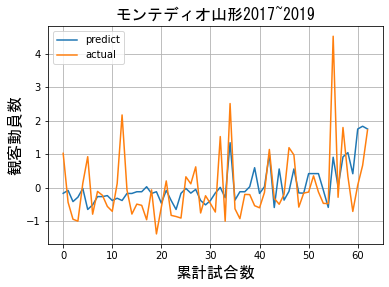

In [42]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\msgothic.ttc', size=16)
predict=data["visitors"]
actual=data["入場者数"]
x=[i for i in range(63)]

plt.title("モンテディオ山形2017~2019",fontproperties=fp)
plt.grid(True)
plt.xlabel("累計試合数",fontproperties=fp)
plt.ylabel("観客動員数",fontproperties=fp)
plt.plot(x,predict,label="predict")
plt.plot(x,actual,label="actual")
plt.legend()
plt.show()

In [30]:
data["difference"]=data["入場者数"]-data["visitors"]
data

,judge,入場者数,visitors,difference
0,11321.0,1.026640,-0.165562,1.192202
1,21121.0,-0.432777,-0.077873,-0.354904
2,11222.0,-0.938352,-0.412286,-0.526066
3,11122.0,-0.995269,-0.281305,-0.713964
4,11231.0,0.133640,-0.020225,0.153865
...,...,...,...,...
58,13112.0,0.340109,1.048374,-0.708264
59,13312.0,-0.705584,0.418247,-1.123831
60,13313.0,0.075153,1.751376,-1.676222
61,13213.0,0.666692,1.834225,-1.167532


In [31]:
data_difference=data.sort_values('difference')
data_difference

,judge,入場者数,visitors,difference
60,13313.0,0.075153,1.751376,-1.676222
19,13321.0,-1.376020,-0.118710,-1.257311
61,13213.0,0.666692,1.834225,-1.167532
39,13122.0,-0.534442,0.598204,-1.132645
59,13312.0,-0.705584,0.418247,-1.123831
...,...,...,...,...
46,11211.0,1.195034,-0.106858,1.301892
32,22322.0,1.526327,0.011530,1.514797
5,11131.0,0.926545,-0.647012,1.573557
12,12321.0,2.170857,-0.379951,2.550808
